## basic setup

In [1]:
from showit import image
%matplotlib inline

## set the path

In [2]:
path = '/Users/freemanj11/Dropbox/janelia/neurofinder/neurofinder.00.00/'

## load the data

In [3]:
import thunder as td

In [4]:
data = td.images.fromtif(path + 'images', stop=10, ext='tiff')

In [5]:
base = data.mean().toarray()

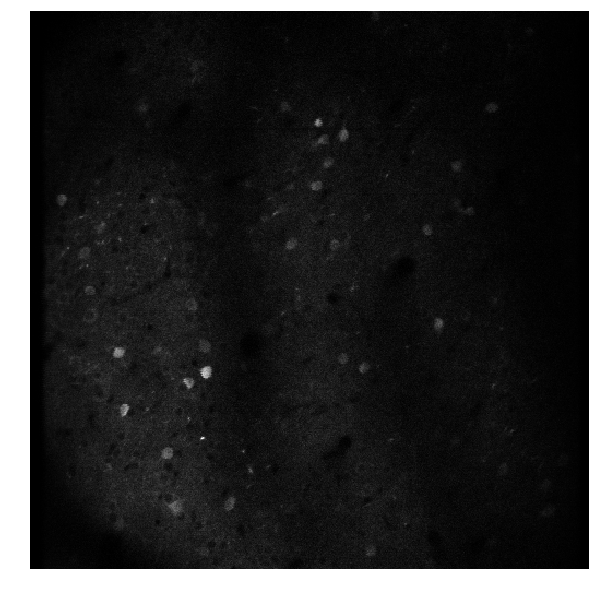

In [6]:
image(base, size=10);

## run the algorithm

In [7]:
from extraction import NMF

In [8]:
algorithm = NMF(k=5, percentile=99, max_iter=50, overlap=0.1)

In [9]:
model = algorithm.fit(data, chunk_size=(50,50), padding=(25,25))

In [10]:
merged = model.merge(overlap=0.1)

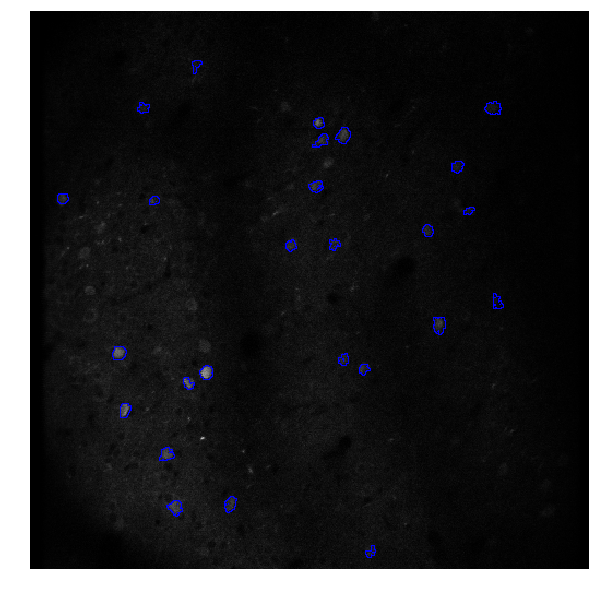

In [11]:
masks = merged.regions.mask(stroke='blue', fill=None, base=base.clip(0,4000) / 4000)
image(masks, size=10);

## load the ground truth

In [12]:
import json

In [13]:
with open(path + 'regions/regions.json', 'r') as f:
    regions = json.load(f)

In [14]:
from regional import many
truth = many([region['coordinates'] for region in regions])

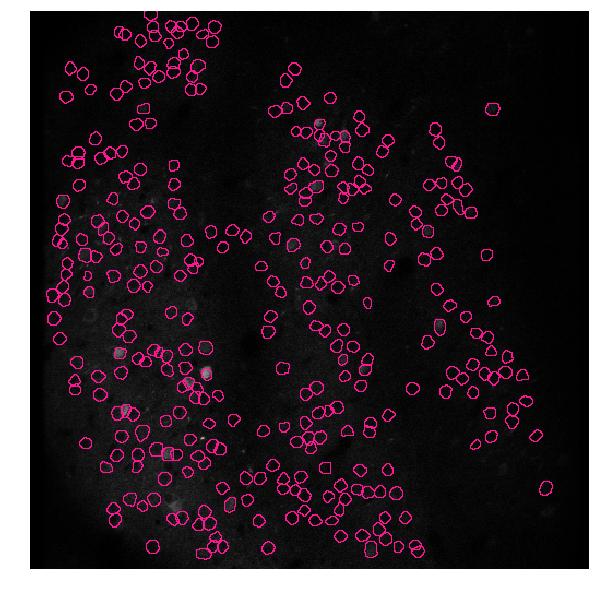

In [15]:
masks = truth.mask(stroke='deeppink', fill=None, base=base.clip(0,4000) / 4000)
image(masks, size=10);

## compare to ground truth

In [16]:
import neurofinder

In [17]:
neurofinder.centers(truth, merged.regions)

(0.078787878787878782, 1.0)

In [18]:
neurofinder.shapes(truth, merged.regions)

(0.28614806623300298, 0.37111055061467574)